In [153]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
df = pd.read_csv('salary.csv')
df.head()

,empID,Name,Experience,salary,age
0,1,Sabin,3.0,3000.0,22.0
1,2,Rabin,4.0,3200.0,23.0
2,3,Babin,5.0,3500.0,34.0
3,4,Mohan,2.0,NaN,34.0
4,5,John,1.0,2400.0,NaN


In [155]:
df.info

<bound method DataFrame.info of     empID      Name  Experience  salary   age
0       1     Sabin         3.0  3000.0  22.0
1       2     Rabin         4.0  3200.0  23.0
2       3     Babin         5.0  3500.0  34.0
3       4     Mohan         2.0     NaN  34.0
4       5      John         1.0  2400.0   NaN
5       6      Sita         0.0  2000.0  21.0
6       7      Rita         NaN  3600.0  27.0
7       8   Prajwal         6.0  3900.0  28.0
8       9  Lingling         7.0     NaN  22.0
9      10     Jacob         2.0  2850.0  27.0
10     11      Maya         NaN  2890.0  30.0
11     12    George         1.0  2500.0  22.0
12     13      Anna         3.0  2900.0  24.0
13     14     Hrafn         8.0     NaN   NaN
14     15      Anju         3.0  3000.0  22.0
15     16    Shreya         4.0  3000.0  23.0
16     17     Amogh         5.0  3600.0  26.0
17     18      Rita         2.0     NaN  22.0
18     19      Mona         NaN     NaN  21.0
19     20       NaN         0.0  1900.0  27.0
20

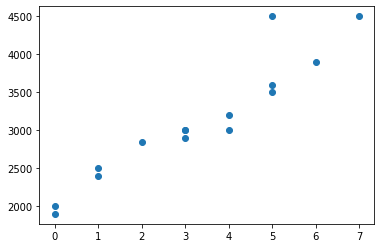

In [156]:
plt.scatter(df['Experience'], df['salary'])

In [157]:
df.shape


(25, 5)

In [158]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [159]:
#data cleaning calculate the missing values and % contributions in DF
df_null = round(100*(df.isnull().sum())/len(df),2)
df_null
df = df.dropna()
df.shape

(13, 5)

In [160]:
y_predicted = km.fit_predict(df[['Experience','salary']])
y_predicted

array([0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1])

In [161]:
df['cluster'] = y_predicted

C:\Users\sabin\AppData\Local\Temp/ipykernel_17956/3490658694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_predicted


In [162]:
#df.drop(['clutter'],axis=1)
df

,empID,Name,Experience,salary,age,cluster
0,1,Sabin,3.0,3000.0,22.0,0
1,2,Rabin,4.0,3200.0,23.0,0
2,3,Babin,5.0,3500.0,34.0,0
5,6,Sita,0.0,2000.0,21.0,2
7,8,Prajwal,6.0,3900.0,28.0,1
9,10,Jacob,2.0,2850.0,27.0,0
11,12,George,1.0,2500.0,22.0,2
12,13,Anna,3.0,2900.0,24.0,0
14,15,Anju,3.0,3000.0,22.0,0
15,16,Shreya,4.0,3000.0,23.0,0


In [163]:
#df.drop(['clutter'],axis=1)

Text(0, 0.5, 'Income of employee')

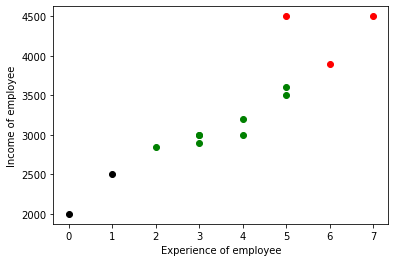

In [164]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Experience,df1['salary'], color = 'green')
plt.scatter(df2.Experience,df2['salary'], color = 'red')
plt.scatter(df3.Experience,df3['salary'], color = 'black')

plt.xlabel('Experience of employee')
plt.ylabel('Income of employee')

In [165]:
scaler = MinMaxScaler()
scaler.fit(df[['salary']])
df['salary'] = scaler.transform(df[['salary']]) 

scaler.fit(df[['Experience']])
df['Experience'] = scaler.transform(df[['Experience']]) 

C:\Users\sabin\AppData\Local\Temp/ipykernel_17956/1532755460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = scaler.transform(df[['salary']])
C:\Users\sabin\AppData\Local\Temp/ipykernel_17956/1532755460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Experience'] = scaler.transform(df[['Experience']])


In [166]:
df

,empID,Name,Experience,salary,age,cluster
0,1,Sabin,0.428571,0.40,22.0,0
1,2,Rabin,0.571429,0.48,23.0,0
2,3,Babin,0.714286,0.60,34.0,0
5,6,Sita,0.000000,0.00,21.0,2
7,8,Prajwal,0.857143,0.76,28.0,1
9,10,Jacob,0.285714,0.34,27.0,0
11,12,George,0.142857,0.20,22.0,2
12,13,Anna,0.428571,0.36,24.0,0
14,15,Anju,0.428571,0.40,22.0,0
15,16,Shreya,0.571429,0.40,23.0,0


In [167]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Experience','salary']])
y_predicted


array([1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0])

In [168]:
df['cluster'] = y_predicted
#df.drop('clutter',axis=1,inplace=True)

C:\Users\sabin\AppData\Local\Temp/ipykernel_17956/937444964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_predicted


In [169]:
df

,empID,Name,Experience,salary,age,cluster
0,1,Sabin,0.428571,0.40,22.0,1
1,2,Rabin,0.571429,0.48,23.0,1
2,3,Babin,0.714286,0.60,34.0,0
5,6,Sita,0.000000,0.00,21.0,2
7,8,Prajwal,0.857143,0.76,28.0,0
9,10,Jacob,0.285714,0.34,27.0,1
11,12,George,0.142857,0.20,22.0,2
12,13,Anna,0.428571,0.36,24.0,1
14,15,Anju,0.428571,0.40,22.0,1
15,16,Shreya,0.571429,0.40,23.0,1


In [170]:
km.cluster_centers_

array([[0.8       , 0.8       ],
       [0.45238095, 0.39666667],
       [0.07142857, 0.1       ]])

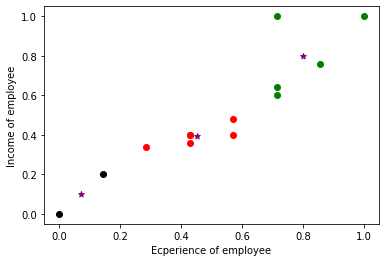

In [171]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Experience,df1['salary'], color = 'green')
plt.scatter(df2.Experience,df2['salary'], color = 'red')
plt.scatter(df3.Experience,df3['salary'], color = 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',label='centroid',marker='*')
plt.xlabel('Ecperience of employee')
plt.ylabel('Income of employee')
plt.show()

In [172]:
K_rng = range(1,10)
sse = []
for k in K_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Experience','salary']])
    sse.append(km.inertia_)

In [173]:
sse

[1.9667817896389326,
 0.6617704081632652,
 0.3120666666666666,
 0.16784897959183676,
 0.11969863945578228,
 0.07888231292517002,
 0.048678231292516985,
 0.022006122448979582,
 0.005066666666666665]

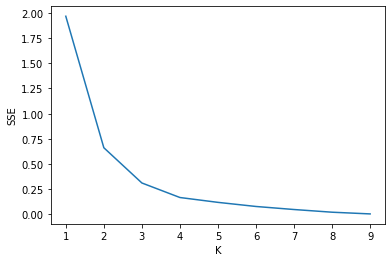

In [175]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(K_rng,sse)